In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('adult(cleaned).csv')

In [7]:
x = df.drop('income', axis = 1)
y = df[['income']]

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

### Basic KNN

In [11]:
KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

accuracy : 0.8330002606655661
recall : 0.5759803921568627
precision : 0.6982173174872666
f1 : 0.6312356101304681
confusion matrix: [[7942  711]
 [1211 1645]]


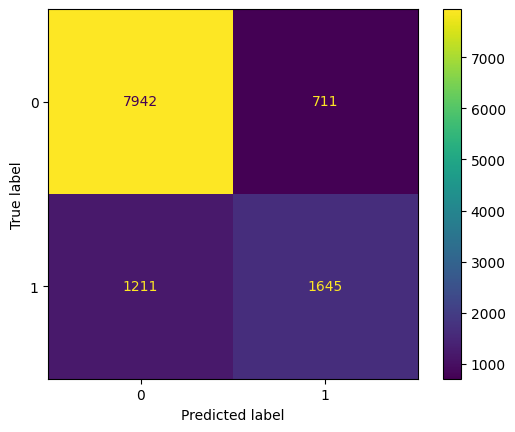

In [15]:
metrics(y_test, y_pred)

### Dropping Country to see if its boost the precision of the model

In [16]:
x = df.drop(['income', 'native-country'], axis = 1)
y = df[['income']]

x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

accuracy : 0.8347380311060909
recall : 0.5938375350140056
precision : 0.6956521739130435
f1 : 0.64072534945221
confusion matrix: [[7911  742]
 [1160 1696]]


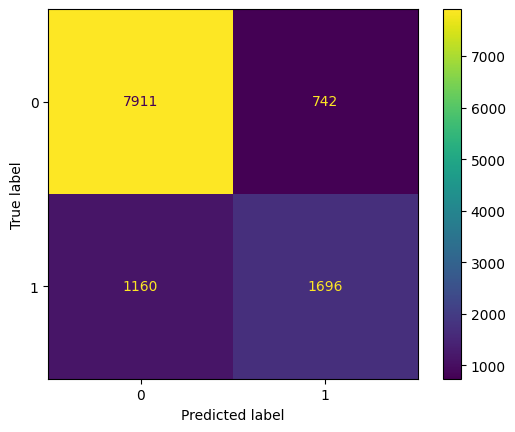

In [17]:
KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)

accuracy : 0.8375184638109305
recall : 0.6116946778711485
precision : 0.6965709728867624
f1 : 0.65137956748695
confusion matrix: [[7892  761]
 [1109 1747]]


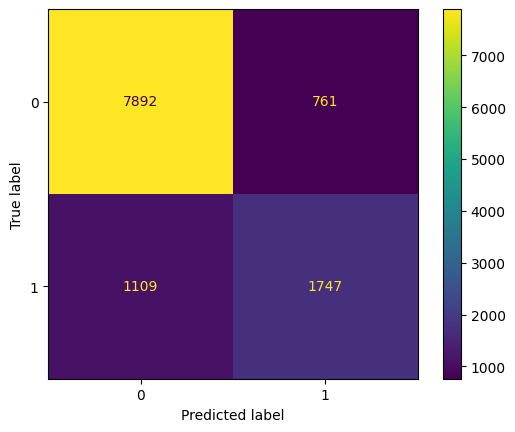

In [35]:
KNN = KNeighborsClassifier(n_neighbors=26, metric="manhattan", weights="uniform")
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)

accuracy : 0.8361282474585108
recall : 0.6292016806722689
precision : 0.6848323170731707
f1 : 0.6558394160583941
confusion matrix: [[7826  827]
 [1059 1797]]


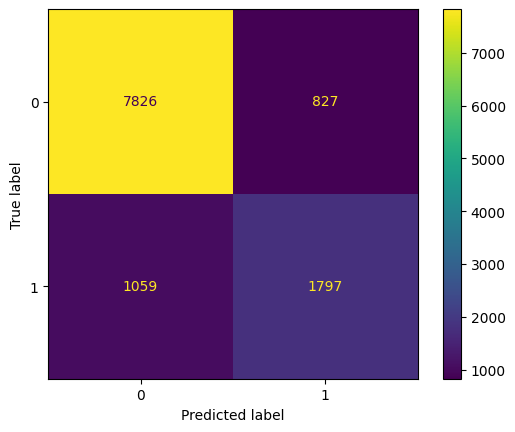

In [34]:
KNN = KNeighborsClassifier(n_neighbors=29, metric="manhattan", weights="distance")
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)

### HyperParameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

#Find Best K based on accuracy

parameters = {"n_neighbors":range(1,30)}
grid_kn=GridSearchCV(estimator=KNN,#model
                     param_grid=parameters, #range of K
                    scoring='accuracy',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 10, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 #Help to cpu
                    )
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 29 candidates, totalling 290 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=14), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy',
             verbose=1)

In [20]:
grid_kn.best_params_

{'n_neighbors': 28}

In [31]:
#Find Best K 

parameters = {
    'n_neighbors': range(1,30),
    'weights': ['distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_kn=GridSearchCV(estimator=KNN,#model
                     param_grid=parameters, #range of K
                    scoring='precision',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 10, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 #Help to cpu
                    )
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 58 candidates, totalling 580 fits


GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=26,
                                            weights='distance'),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 30), 'weights': ['distance']},
             scoring='precision', verbose=1)

In [32]:
grid_kn.best_params_

{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}